In [24]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import random
from sklearn.cluster import KMeans

In [25]:
df1 = pd.read_csv('data/1step.csv', index_col='time')
df2 = pd.read_csv('data/2step.csv', index_col='time')
df1_ratio = pd.read_csv('data/1step_percent.csv', index_col='time')
df2_ratio = pd.read_csv('data/2step_percent.csv', index_col='time')

# int columns
df1.columns = [int(i) for i in df1.columns]
df1.columns = [int(i) for i in df2.columns]
df1_ratio.columns = [int(i) for i in df1_ratio.columns]
df2_ratio.columns = [int(i) for i in df2_ratio.columns]

df1_pre = df1_ratio.iloc[3000:4576]
df1_post = df1_ratio.iloc[4577:21911]
df2_pre = df2_ratio.iloc[3264:6894]
df2_post = df2_ratio.iloc[6895:35524]
df1_pre

,2,3,4,5,6,7,8,9,10,11,...,306,307,308,309,310,311,312,313,314,315
time,,,,,,,,,,,,,,,,,,,,,
600.0,0.000030,0.000018,0.000000,0.0,0.000000,0.000000,0.000000,0.000078,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
600.2,0.000023,0.000000,0.000041,0.0,0.000000,0.000022,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000019
600.4,0.000021,0.000000,0.000000,0.0,0.000000,0.000000,0.000015,0.000027,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
600.6,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
600.8,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000014,0.000015,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914.2,0.000053,0.000043,0.000000,0.0,0.000000,0.000000,0.000061,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
914.4,0.000000,0.000000,0.000020,0.0,0.000000,0.000000,0.000026,0.000000,0.000061,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
914.6,0.000024,0.000000,0.000020,0.0,0.000053,0.000000,0.000000,0.000000,0.000025,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


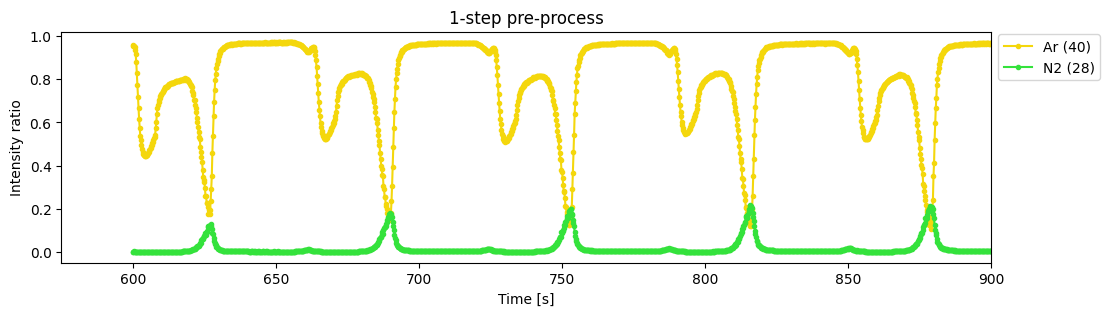

In [28]:
# intensity change of H2O (18)
plt.figure(figsize=(12,3))
plt.plot(df1_pre.loc[:,40],'.-', color=colors[3])
plt.plot(df1_pre.loc[:,17],'.-', color=colors[5])
plt.xlabel('Time [s]')
plt.xlim(575,900)
plt.ylabel('Intensity ratio')
plt.title('1-step pre-process')
plt.legend(['Ar (40)','N2 (28)'], bbox_to_anchor=(1,1.02), loc='upper left')
plt.show()

In [ ]:
df1_pre_scaled = df1_pre.copy()
df2_pre_scaled = df2_pre.copy()

# min-max scaling for each column
for col in df1_pre_scaled .columns:
    df1_pre_scaled [col] = df1_pre_scaled [col].apply(lambda x: (x-df1_pre_scaled [col].min())/(df1_pre_scaled [col].max()-df1_pre_scaled [col].min()))

# min-max scaling for each column
for col in df2_pre_scaled.columns:
    df2_pre_scaled[col] = df2_pre_scaled[col].apply(lambda x: (x-df2_pre_scaled[col].min())/(df2_pre_scaled[col].max()-df2_pre_scaled[col].min()))
    
df1_pre_scaled

In [22]:
# random color generator
random.seed(38)
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(20)]

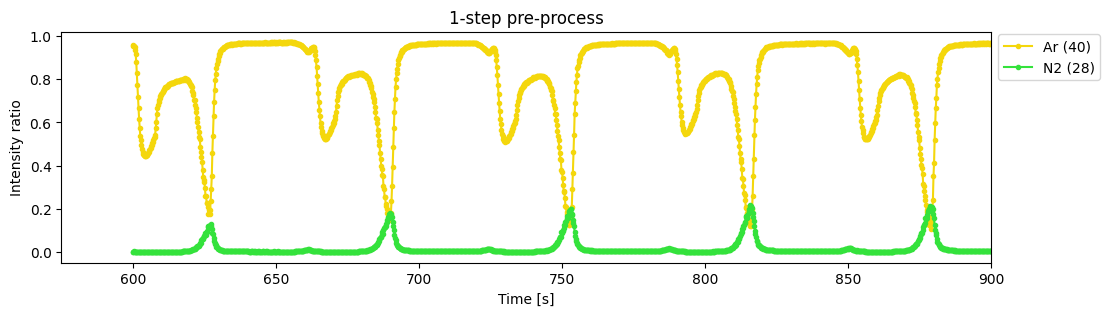

In [41]:
# intensity change of H2O (18)
plt.figure(figsize=(12,3))
plt.plot(df1_pre_scaled.loc[:,40],'.-', color=colors[3])
plt.plot(df1_pre_scaled.loc[:,17],'.-', color=colors[5])
plt.xlabel('Time [s]')
plt.xlim(575,900)
plt.ylabel('Intensity ratio')
plt.title('1-step pre-process')
plt.legend(['Ar (40)','N2 (28)'], bbox_to_anchor=(1,1.02), loc='upper left')
plt.show()

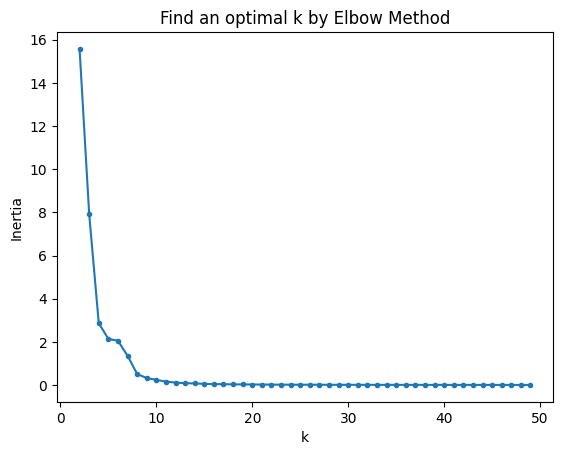

In [42]:
# find the best k for K-Means alg
inertia = []
for k in range(2,50):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df1_pre_scaled.T)
    inertia.append(km.inertia_)

# find an elbow by plotting values of inertia
plt.plot(range(2,50),inertia,'.-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Find an optimal k by Elbow Method')
plt.show()

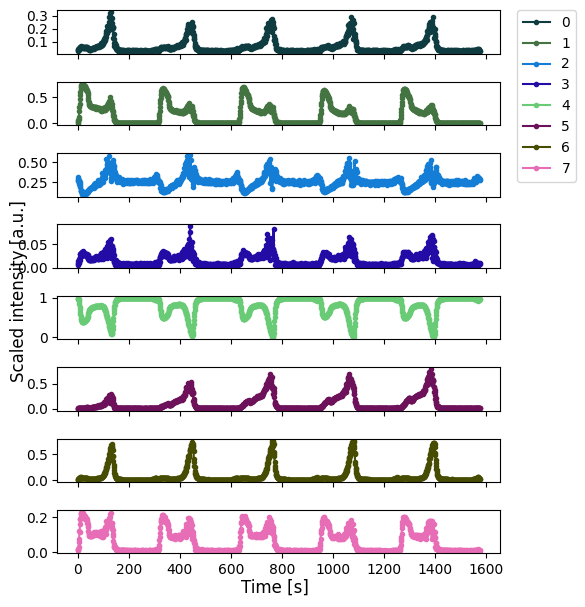

[40, 22, 9, 162, 1, 8, 14, 58]


,pattern0,pattern1,pattern2,pattern3,pattern4,pattern5,pattern6,pattern7
0,21.0,63.0,20.0,2,40.0,44.0,14.0,56.0
1,22.0,64.0,39.0,3,NaN,78.0,15.0,60.0
2,23.0,65.0,41.0,4,NaN,79.0,16.0,62.0
3,24.0,66.0,42.0,5,NaN,81.0,17.0,67.0
4,25.0,98.0,43.0,6,NaN,114.0,18.0,68.0
...,...,...,...,...,...,...,...,...
157,NaN,NaN,NaN,311,NaN,NaN,NaN,NaN
158,NaN,NaN,NaN,312,NaN,NaN,NaN,NaN
159,NaN,NaN,NaN,313,NaN,NaN,NaN,NaN
160,NaN,NaN,NaN,314,NaN,NaN,NaN,NaN


In [73]:
k = 8
km = KMeans(n_clusters=k, random_state=42)
km.fit(df1_pre_scaled.T)

# random color generator
import random
random.seed(31)
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(10)]

# colors
label_color = colors

# draw cluster centers
fig, axs = plt.subplots(k,1, sharex=True, figsize=(5,6))
fig.tight_layout(pad=1)
for idx, val in enumerate(km.cluster_centers_):
    axs[idx].plot(val,'.-',color=label_color[idx])
    
fig.supxlabel('Time [s]', y=-0.01)
fig.supylabel('Scaled intensity [a.u.]', x=-0.03)
fig.legend(set(km.labels_), bbox_to_anchor=(0.97, 0.98), loc='upper left')
fig.savefig(f'data/figure/1step_pre_patterns.png', bbox_inches='tight')
plt.show()

# num of elements1
wv_labled = []
for i in range(k): 
    wv_labled.append(df1_pre_scaled.T[km.labels_==i].index.tolist())
print([len(i) for i in wv_labled])

df_labeled = []
for i in range(0,k):
    df_labeled.append(pd.DataFrame(wv_labled[i], columns=[f'pattern{i}']))
df_labeled = pd.concat([i for i in df_labeled], axis=1)
pattern.to_csv(f'data/1step_pre_patterns.csv')
df_labeled

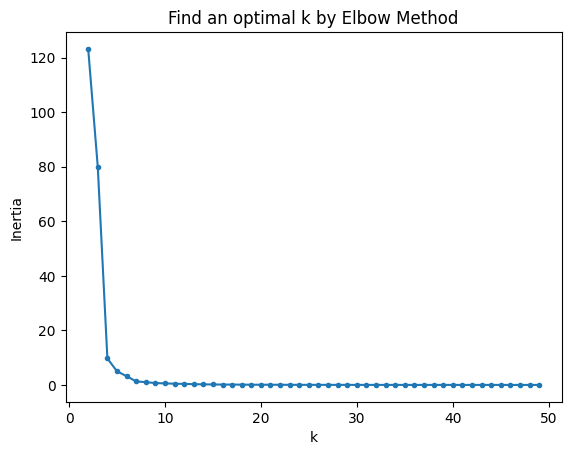

In [67]:
# find the best k for K-Means alg
inertia = []
for k in range(2,50):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df2_pre_scaled.T)
    inertia.append(km.inertia_)

# find an elbow by plotting values of inertia
plt.plot(range(2,50),inertia,'.-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Find an optimal k by Elbow Method')
plt.show()

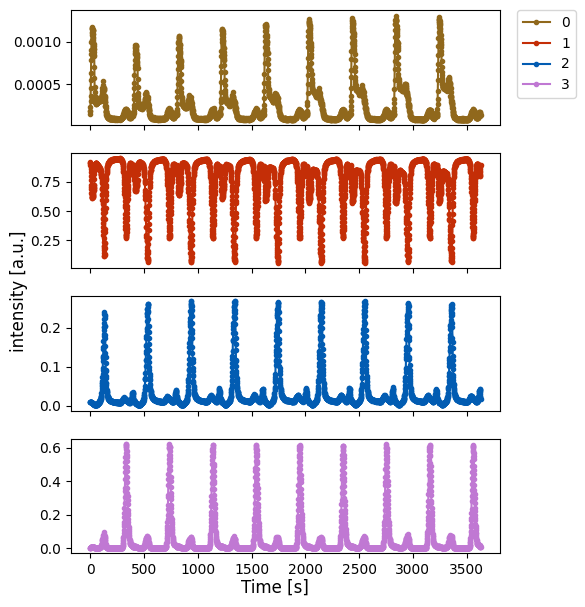

[309, 1, 3, 1]


,pattern0,pattern1,pattern2,pattern3
0,2,40.0,16.0,28.0
1,3,NaN,17.0,NaN
2,4,NaN,18.0,NaN
3,5,NaN,NaN,NaN
4,6,NaN,NaN,NaN
...,...,...,...,...
304,311,NaN,NaN,NaN
305,312,NaN,NaN,NaN
306,313,NaN,NaN,NaN
307,314,NaN,NaN,NaN


In [75]:
k = 4
km = KMeans(n_clusters=k, random_state=42)
km.fit(df2_pre_scaled.T)

# random color generator
import random
random.seed(30)
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(10)]

# colors
label_color = colors

# draw cluster centers
fig, axs = plt.subplots(k,1, sharex=True, figsize=(5,6))
fig.tight_layout(pad=1)
for idx, val in enumerate(km.cluster_centers_):
    axs[idx].plot(val,'.-',color=label_color[idx])
    
fig.supxlabel('Time [s]', y=-0.01)
fig.supylabel('intensity [a.u.]', x=-0.03)
fig.legend(set(km.labels_), bbox_to_anchor=(0.97, 0.98), loc='upper left')
fig.savefig(f'data/figure/2step_pre_patterns.png', bbox_inches='tight')
plt.show()

# num of elements1
wv_labled = []
for i in range(k): 
    wv_labled.append(df2_pre_scaled.T[km.labels_==i].index.tolist())
print([len(i) for i in wv_labled])

df_labeled = []
for i in range(0,k):
    df_labeled.append(pd.DataFrame(wv_labled[i], columns=[f'pattern{i}']))
df_labeled = pd.concat([i for i in df_labeled], axis=1)
pattern.to_csv(f'data/2step_pre_patterns.csv')
df_labeled

In [78]:
# at the end of the post
df1_post = df1_ratio.iloc[20335:21911]
df2_post = df2_ratio.iloc[31894:35524]

In [80]:
# scaling
df1_post_scaled = df1_post.copy()
df2_post_scaled = df2_post.copy()

# min-max scaling for each column
for col in df1_post_scaled.columns:
    df1_post_scaled[col] = df1_post_scaled[col].apply(lambda x: (x-df1_post_scaled[col].min())/(df1_post_scaled[col].max()-df1_post_scaled[col].min()))

# min-max scaling for each column
for col in df2_post_scaled.columns:
    df2_post_scaled[col] = df2_post_scaled[col].apply(lambda x: (x-df2_post_scaled[col].min())/(df2_post_scaled[col].max()-df2_post_scaled[col].min()))
    
df1_post_scaled

C:\Users\syj43\AppData\Local\Temp\ipykernel_16040\4053636730.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_post[col] = df1_post[col].apply(lambda x: (x-df1_post[col].min())/(df1_post[col].max()-df1_post[col].min()))
C:\Users\syj43\AppData\Local\Temp\ipykernel_16040\4053636730.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_post[col] = df2_post[col].apply(lambda x: (x-df2_post[col].min())/(df2_post[col].max()-df2_post[col].min()))


,2,3,4,5,6,7,8,9,10,11,...,306,307,308,309,310,311,312,313,314,315
time,,,,,,,,,,,,,,,,,,,,,
4067.0,0.000033,0.000000,0.000000,0.000000,0.000000,0.000000,0.000014,0.000042,0.000011,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
4067.2,0.000016,0.000000,0.000018,0.000000,0.000014,0.000021,0.000000,0.000000,0.000036,0.000022,...,0.000000,0.000013,0.000000,0.0,0.000009,0.000012,0.000000,0.0,0.0,0.000000
4067.4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000020,0.000045,0.000022,0.000000,0.000030,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
4067.6,0.000025,0.000015,0.000000,0.000020,0.000000,0.000000,0.000000,0.000017,0.000016,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000016
4067.8,0.000074,0.000012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000041,0.000035,0.000000,...,0.000000,0.000000,0.000017,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381.2,0.000007,0.000000,0.000000,0.000008,0.000007,0.000004,0.000020,0.000024,0.000024,0.000023,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000009,0.0,0.0,0.000000
4381.4,0.000009,0.000008,0.000000,0.000000,0.000000,0.000000,0.000008,0.000028,0.000018,0.000018,...,0.000000,0.000000,0.000000,0.0,0.000009,0.000000,0.000000,0.0,0.0,0.000000
4381.6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000013,0.000017,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000


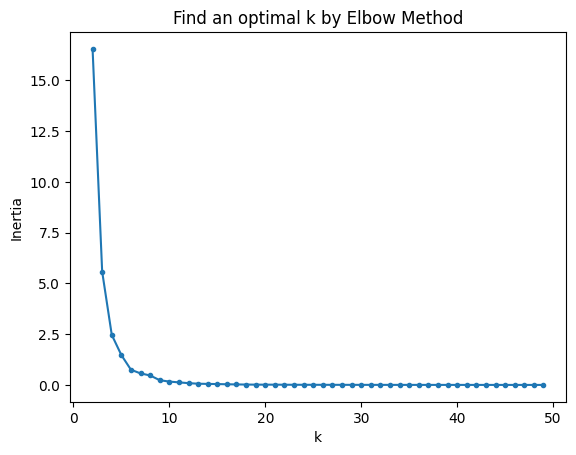

In [82]:
# find the best k for K-Means alg
inertia = []
for k in range(2,50):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df1_post_scaled.T)
    inertia.append(km.inertia_)

# find an elbow by plotting values of inertia
plt.plot(range(2,50),inertia,'.-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Find an optimal k by Elbow Method')
plt.show()

In [ ]:
k = 6
km = KMeans(n_clusters=k, random_state=42)
km.fit(df1_post_scaled.T)

# random color generator
import random
random.seed(30)
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(10)]

# colors
label_color = colors

# draw cluster centers
fig, axs = plt.subplots(k,1, sharex=True, figsize=(5,6))
fig.tight_layout(pad=1)
for idx, val in enumerate(km.cluster_centers_):
    axs[idx].plot(val,'.-',color=label_color[idx])
    
fig.supxlabel('Time [s]', y=-0.01)
fig.supylabel('intensity [a.u.]', x=-0.03)
fig.legend(set(km.labels_), bbox_to_anchor=(0.97, 0.98), loc='upper left')
fig.savefig(f'data/figure/2step_pre_patterns.png', bbox_inches='tight')
plt.show()

# num of elements1
wv_labled = []
for i in range(k): 
    wv_labled.append(df2_pre_scaled.T[km.labels_==i].index.tolist())
print([len(i) for i in wv_labled])

df_labeled = []
for i in range(0,k):
    df_labeled.append(pd.DataFrame(wv_labled[i], columns=[f'pattern{i}']))
df_labeled = pd.concat([i for i in df_labeled], axis=1)
pattern.to_csv(f'data/2step_pre_patterns.csv')
df_labeled